# Titanic Survival Prediction Project
## Author: Louay daher

### Goal
Predict whether a passenger survived the Titanic disaster based on features like age, sex, and ticket class.

## 1. Import Libraries
- Import pandas, numpy
- Import matplotlib, seaborn
- Import sklearn modules (train_test_split, models, metrics)

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer
# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer
# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder


## 2. Load Data
- Load `train.csv` and `test.csv`
- Display first 5 rows
- Show dataset shape

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
train_data.head()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploratory Data Analysis (EDA)
- Check info() and missing values
- Show distribution of target variable (Survived)
- Visualize survival by:
  - Sex
  - Pclass
  - Age groups

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

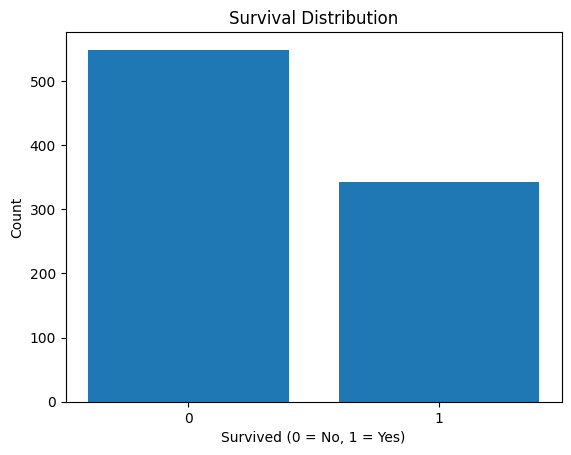

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


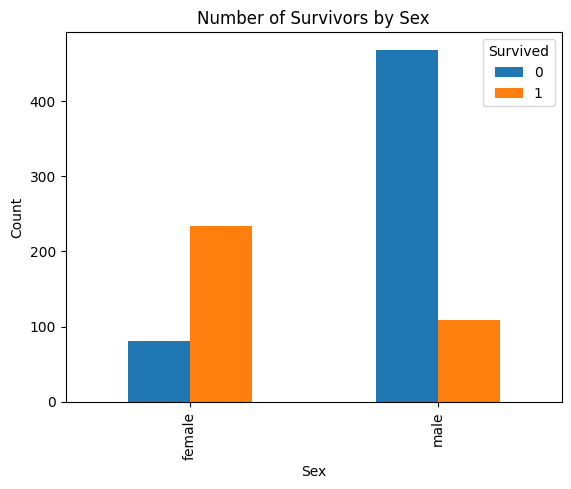

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


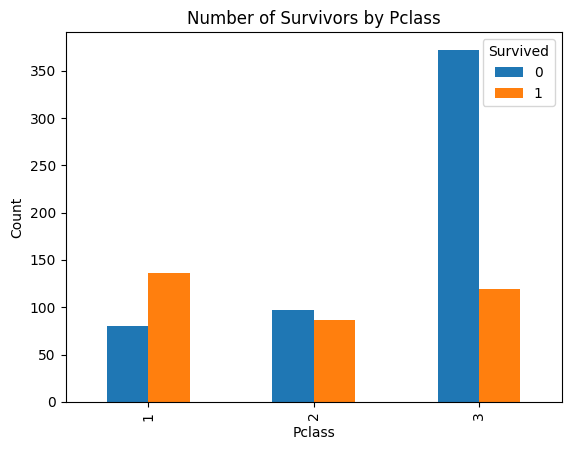

In [6]:
print(train_data.info())
print(train_data.isna().sum())
fig, ax = plt.subplots()
survival_counts = train_data["Survived"].value_counts()
ax.bar(survival_counts.index, survival_counts.values)

# Add title and labels
ax.set(
    title="Survival Distribution",
    xlabel="Survived (0 = No, 1 = Yes)",
    ylabel="Count"
)

# Force x-axis ticks to be only 0 and 1
ax.set_xticks([0, 1])

plt.show()

# Survival by sex
counts_by_sex = train_data.groupby("Sex")["Survived"].value_counts()
print(counts_by_sex)
fig, ax = plt.subplots()

survival_by_sex = train_data.groupby("Sex")["Survived"].value_counts().unstack()

survival_by_sex.plot(kind="bar", ax=ax)

ax.set(
    title="Number of Survivors by Sex",
    xlabel="Sex",
    ylabel="Count"
)

plt.show()

# Survival by class
counts_by_Pclass=train_data.groupby("Pclass")["Survived"].value_counts()
fig, ax = plt.subplots()
survival_by_Pclass=train_data.groupby("Pclass")["Survived"].value_counts().unstack()
print(survival_by_Pclass)
survival_by_Pclass.plot(kind="bar",ax=ax)
ax.set(title="Number of Survivors by Pclass",
       xlabel="Pclass",
       ylabel="Count")

plt.show()


## 4. Data Preprocessing
- Handle missing values (Age, Embarked, Fare)
- Feature engineering:
  - Create FamilySize
  - Extract Title from Name
- Encode categorical variables (Sex, Embarked, Title)
- Drop unnecessary columns (PassengerId, Name, Ticket, Cabin)

In [ ]:
# ======================
# 2. Feature Engineering
# ======================

# 1. Extract Title from Name
for dataset in [train_data, test_data]:
    dataset["Title"] = dataset["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

print(train_data[[ "Title"]])


# Bin Age into groups
for dataset in [train_data, test_data]:
    dataset["AgeGroup"] = pd.cut(dataset["Age"],
                                 bins=[0, 12, 18, 35, 60, 80],
                                 labels=["Child", "Teenager", "YoungAdult", "Adult", "Senior"])

# Family size feature
for dataset in [train_data, test_data]:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

# IsAlone feature
for dataset in [train_data, test_data]:
    dataset["IsAlone"] = 1
    dataset.loc[dataset["FamilySize"] > 1, "IsAlone"] = 0


    Title
0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
..    ...
886   Rev
887  Miss
888  Miss
889    Mr
890    Mr

[891 rows x 1 columns]
0      YoungAdult
1           Adult
2      YoungAdult
3      YoungAdult
4      YoungAdult
          ...    
886    YoungAdult
887    YoungAdult
888           NaN
889    YoungAdult
890    YoungAdult
Name: AgeGroup, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Teenager' < 'YoungAdult' < 'Adult' < 'Senior']
0      YoungAdult
1           Adult
2      YoungAdult
3      YoungAdult
4      YoungAdult
          ...    
886    YoungAdult
887    YoungAdult
888           NaN
889    YoungAdult
890    YoungAdult
Name: AgeGroup, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Teenager' < 'YoungAdult' < 'Adult' < 'Senior']


In [8]:
#  Missing value
numeric_features = ["Age"]

# Crearte numeric_transformer transformer Pipeline
numeric_transformer  = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median"
    ("imputer", SimpleImputer(strategy="median"))])



In [9]:
categorical_features =["Sex","Embarked","AgeGroup"]
categorical_transformer=Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [10]:
# ======================
# 4. Drop unused columns
# ======================
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
train_data = train_data.drop(columns=drop_cols)
test_data = test_data.drop(columns=drop_cols)

In [11]:
# ======================
# 5. ColumnTransformer to combine both
# ======================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

## 5. Train/Test Split
- Split data into X (features) and y (target)
- Train/test split (80/20)

In [12]:

# Features and target
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

# Split into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Baseline Model – Logistic Regression
- Train logistic regression
- Evaluate accuracy, confusion matrix, classification report

In [13]:

LogisticRegression_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", LogisticRegression(max_iter=1000))])

LogisticRegression_pipeline.fit(X_train,y_train)

y_preds = LogisticRegression_pipeline.predict(X_test)
# Logistic Regression Evaluation
print(accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds ))


0.7821229050279329
[[88 17]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## 7. Stronger Model – Random Forest
- Train random forest
- Evaluate accuracy, confusion matrix, classification report

In [14]:
clf=RandomForestClassifier( random_state=42)
clf_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", clf)])

clf_pipeline.fit(X_train,y_train)
y_preds=clf_pipeline.predict(X_test)
print(accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds ))
clf_pipeline.score(X_test,y_test)

0.7486033519553073
[[88 17]
 [28 46]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       105
           1       0.73      0.62      0.67        74

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.74       179



0.7486033519553073

## 8. Cross-Validation
- Perform cross-validation with the best model
- Report mean accuracy

In [15]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LogisticRegression_pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-validation scores: [0.81005587 0.80337079 0.78651685 0.75280899 0.78651685]
Mean CV accuracy: 0.787853869813571
Standard deviation: 0.019826357435864733


In [16]:
cv_score_random_forest=cross_val_score(clf_pipeline,X,y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_score_random_forest)
print("Mean CV accuracy:", np.mean(cv_score_random_forest))
print("Standard deviation:", np.std(cv_score_random_forest))

Cross-validation scores: [0.74860335 0.78089888 0.75842697 0.70786517 0.7752809 ]
Mean CV accuracy: 0.7542150524135333
Standard deviation: 0.02589725655618365


## Hyperparameter tuning using GridSearchCV



In [17]:
# Different LogisticRegression hyperparameters
from sklearn.model_selection import GridSearchCV

log_reg_grid = {
    "model__C": np.logspace(-4, 4, 20),  # note the 'model__' prefix
    "model__solver": ["liblinear"]
}
# Setup np random seed of 42
np.random.seed(42)


# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
grid_search = GridSearchCV(
    estimator=LogisticRegression_pipeline,
    param_grid=log_reg_grid,
    cv=5,               # 5-fold cross-validation
    scoring="accuracy", # use accuracy to evaluate
    verbose=1
)

# Fit the instance of RandomizedSearchCV
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)
grid_search.best_estimator_.fit(X, y)  

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'model__C': np.float64(0.615848211066026), 'model__solver': 'liblinear'}
Best CV accuracy: 0.7892839554811386


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 10. Final Model Training & Prediction
- Train best model on full training set
- Predict on test.csv
- Save results to submission.csv

In [18]:
original_test = pd.read_csv("test.csv")
X_test_final = test_data.copy()  # your current preprocessed test set

# Predict
y_test_preds = grid_search.best_estimator_.predict(X_test_final)

# Create submission with original PassengerId
submission = pd.DataFrame({
    "PassengerId": original_test["PassengerId"],
    "Survived": y_test_preds
})

# Save submission
submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv
